In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import nibabel as nb
import random

from sklearn.preprocessing import MinMaxScaler
import glob

# DATA PREPARATION


In [2]:
train_data_path = "./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

In [3]:
test_image_flair = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_flair.nii").get_fdata()
test_image_seg = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_seg.nii").get_fdata()
test_image_t1 = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_t1ce.nii").get_fdata()
test_image_t2 = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_t2.nii").get_fdata()

scaler = MinMaxScaler()

test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)


In [4]:
# Testing scale
print("The minimum value is: ",test_image_flair.min())
print("The maximum value is: ",test_image_flair.max())

The minimum value is:  0.0
The maximum value is:  1.0


In [5]:
test_image_flair.shape

(240, 240, 155)

In [6]:
# Mask Labels
np.unique(test_image_seg)

array([0., 1., 2., 4.])

In [7]:
# Converting to int
test_image_seg = test_image_seg.astype(np.uint8)
np.unique(test_image_seg)

array([0, 1, 2, 4], dtype=uint8)

In [8]:
# reassigning value 4 to 3, because there is no label 3 in data
test_image_seg[test_image_seg == 4] = 3
np.unique(test_image_seg)

array([0, 1, 2, 3], dtype=uint8)

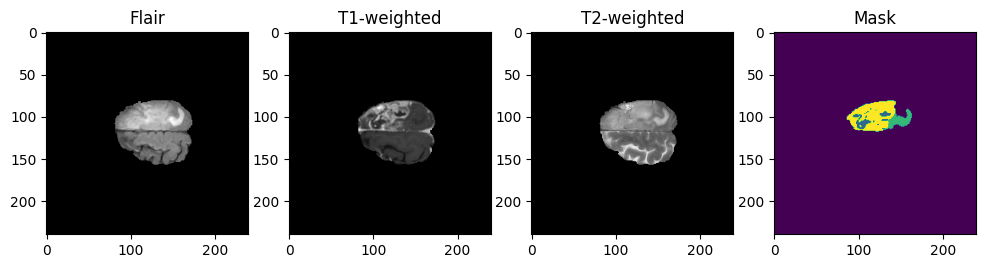

In [9]:
# Random value (dim)
slice = random.randint(0, test_image_seg.shape[2])

# Figure
plt.figure(figsize=(12,8))

# Flair image
plt.subplot(141)
plt.imshow(test_image_flair[:,:,slice], cmap='gray')
plt.title("Flair")

# T1-weighted image
plt.subplot(142)
plt.imshow(test_image_t1[:,:,slice], cmap='gray')
plt.title("T1-weighted")

# T2-weighted image
plt.subplot(143)
plt.imshow(test_image_t2[:,:,slice], cmap='gray')
plt.title("T2-weighted")

# Mask image
plt.subplot(144)
plt.imshow(test_image_seg[:,:,slice])
plt.title("Mask")

plt.show()

## Combining 3 images by exploring to channels and Cropping

3 images T1,T2,Flair are going to be combined since thay have more informative

In [11]:
combined = np.stack([test_image_flair,test_image_t2,test_image_t1],axis=3)    
combined.shape

(240, 240, 155, 3)

In [12]:
# Cropping image

# Crop combined
combined_cropped = combined[56:184,56:184,13:141]  

# Crop MASK
mask_cropped = test_image_seg[56:184,56:184,13:141] 

In [13]:
print("Cropped shape of combined image: ", combined_cropped.shape)
print("Cropped shape of mask image: ", mask_cropped.shape)

Cropped shape of combined image:  (128, 128, 128, 3)
Cropped shape of mask image:  (128, 128, 128)


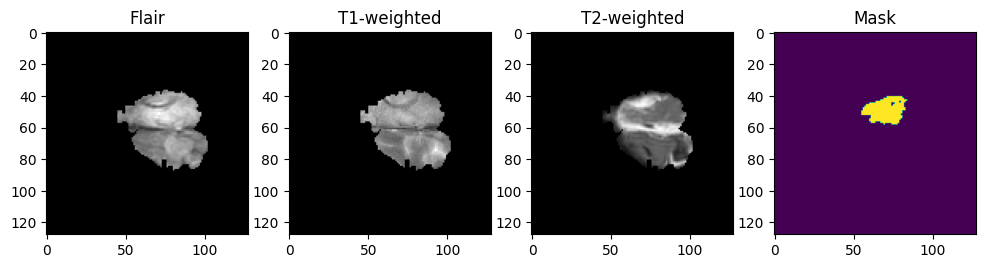

In [14]:
# Random value (dim)
slice = random.randint(0, test_image_seg.shape[2])

# Figure
plt.figure(figsize=(12,8))

# Flair image
plt.subplot(141)
plt.imshow(combined_cropped[:,:,slice,0], cmap='gray')
plt.title("Flair")

# T1-weighted image
plt.subplot(142)
plt.imshow(combined_cropped[:,:,slice,1], cmap='gray')
plt.title("T1-weighted")

# T2-weighted image
plt.subplot(143)
plt.imshow(combined_cropped[:,:,slice,2], cmap='gray')
plt.title("T2-weighted")

# Mask image
plt.subplot(144)
plt.imshow(mask_cropped[:,:,slice])
plt.title("Mask")

plt.show()

I have done so far with one image, now, it is time to apply what I did for all images in dataset